In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

#Read Data
data = pd.read_csv("customers.csv")
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [ ]:
#Find all mean, standard deviation and percentile (25%, 50% and 75% ) for all numerical values.
print(data.describe())

       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000               73.000000
max    200.000000   70.000000          137.000000               99.000000


In [ ]:
#find how many males and females
print(data["Gender"].describe())

count        200
unique         2
top       Female
freq         112
Name: Gender, dtype: object


In [ ]:
#Are there any missing values in the data set?
print(data.isna().sum())

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


{'whiskers': [<matplotlib.lines.Line2D at 0x7f248dcd5990>,
 'caps': [<matplotlib.lines.Line2D at 0x7f248dcd5ed0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f248dcd56f0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f248dcd6410>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f248dcd66b0>],
 'means': []}

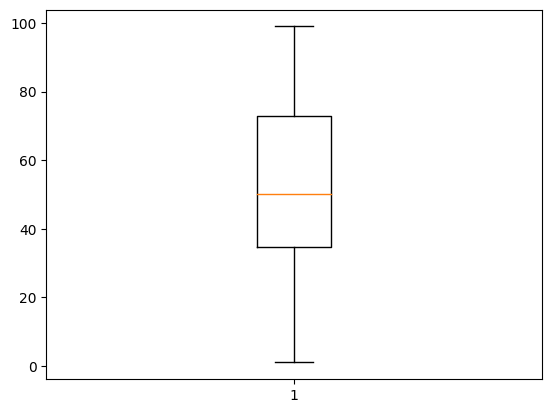

In [ ]:
#box plot showing the distrbution of spending score
plt.boxplot(data["Spending Score (1-100)"])

(array([24., 22., 28., 38., 30., 36.,  8.,  6.,  4.,  4.]),
 array([ 15. ,  27.2,  39.4,  51.6,  63.8,  76. ,  88.2, 100.4, 112.6,
        124.8, 137. ]),
 <BarContainer object of 10 artists>)

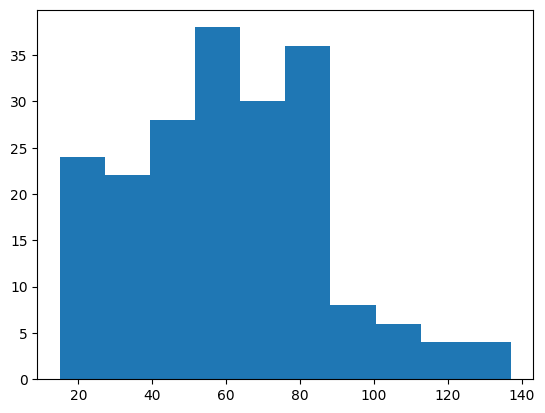

In [ ]:
#annual income data
plt.hist(data["Annual Income (k$)"])

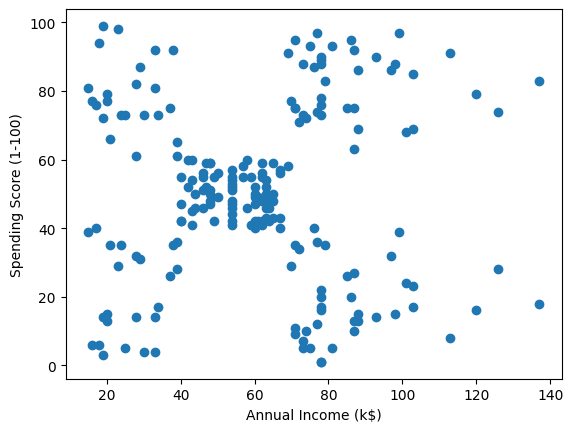

In [ ]:
#relation between annual income and spending score
plt.scatter(data["Annual Income (k$)"], data["Spending Score (1-100)"])
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

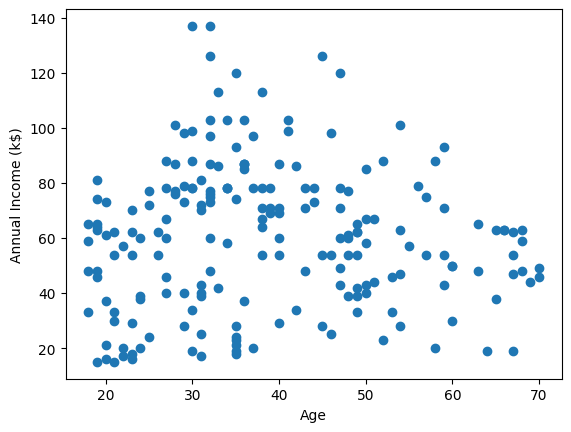

In [ ]:
#relation between age and annual income
plt.scatter(data["Age"], data["Annual Income (k$)"])
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
plt.show()

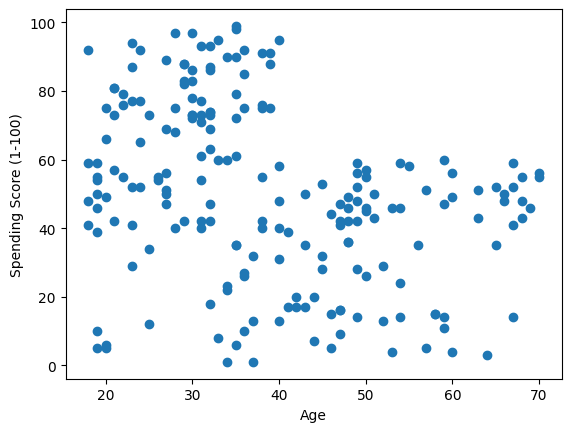

In [ ]:
#relation between age and spending score
plt.scatter(data["Age"], data["Spending Score (1-100)"])
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.show()

In [ ]:
#get selected coloumns
guess =data[["Annual Income (k$)","Spending Score (1-100)"]]
#Create Kmean model with 5 clusters
kmeans = KMeans(n_clusters=5)

#Fit the model
kmeans.fit(guess)

# Get the cluster labels
labels =kmeans.predict(guess)

# Add labels to original data
data['Spending_Group'] =labels

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


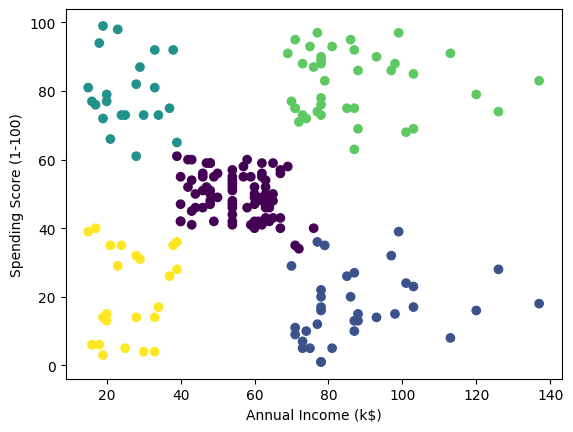

In [ ]:
#Show Clusters

plt.scatter(data['Annual Income (k$)'], data['Spending Score (1-100)'], c=[data['Spending_Group']])
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

In [ ]:
data.loc[data['Spending_Group'] == 0, 'Spending_Group'] = "Cluster 1"
data.loc[data['Spending_Group'] == 1, 'Spending_Group'] = "Cluster 2"
data.loc[data['Spending_Group'] == 2, 'Spending_Group'] = "Cluster 3"
data.loc[data['Spending_Group'] == 3, 'Spending_Group'] = "Cluster 4"
data.loc[data['Spending_Group'] == 4, 'Spending_Group'] = "Cluster 5"
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Spending_Group
0,1,Male,19,15,39,Cluster 5
1,2,Male,21,15,81,Cluster 3
2,3,Female,20,16,6,Cluster 5
3,4,Female,23,16,77,Cluster 3
4,5,Female,31,17,40,Cluster 5
...,...,...,...,...,...,...
195,196,Female,35,120,79,Cluster 4
196,197,Female,45,126,28,Cluster 2
197,198,Male,32,126,74,Cluster 4
198,199,Male,32,137,18,Cluster 2
